
# Hyprop Project - Agrotech Lab (17252)

Yedidya Harris

Yehuda Yungshtein

---





##  Introduction
<p dir="rtl" style="text-align: right;">
בפרויקט זה ניסינו לייצר כלי פשוט ומדויק למדידת תכונות הידראוליות של קרקעות. 
<p dir="rtl" style="text-align: right;">
בעוד שחקלאים רבים מודעים למצב הצומח שלהם ואף לתכונות מסוימות של הקרקע (מרקם הקרקע, כמות יסודות הזנה, כמות גיר וכד'), בדיקות הידראוליות של הקרקע אינן בשימוש נרחב ולרוב החקלאים מסתמכים על קירובים שנגזרים ממרקם הקרקע.

<p dir="rtl" style="text-align: right;">
חיישני קרקע למדידות תכונות הידראוליות הם יקרים מאוד ועל כן גם בדיקה של תכונות אלה יקרה וחקלאים רבים מעדיפים לוותר עליה. אחת השיטות לבדיקת תכונות הידראוליות של הקרקע היא באמצעות מכשיר Hyprop. (למידע נוסף עיין בקישורים המצורפים בסוף המסמך). בפרויקט זה הרכבנו מכשיר בעל אותו עקרון פעולה המבוסס על ESP32. למכשיר קראנו בשם: SHC Meter - Soil Hydraulic Conductivity Meter.





<p dir="rtl" style="text-align: right;">
התוצרים הסופיים שאליהם אנו צופים להגיע:<p dir="rtl" style="text-align: right;">
1. עקום תאחיזה של הקרקע
<p dir="rtl" style="text-align: right;">
 עקום התאחיזה של הקרקע (מכונה גם curve retention או curve characteristic moisture soil) מתאר את הקשר
בין תכולת הרטיבות לעומד המטריצי במצב של שיווי משקל. עקום התאחיזה הוא הוא בעל חשיבות
רבה בתאור התכונות ההידראוליות של הקרקע והוא נדרש לצורך מידול תהליכי זרימה והסעה, לטובת ניהול ההשקיה
ולישומים רבים נוספים הקשורים לניהול או הערכה של מי הקרקע. ישנם מודלים שונים לחישוב עקום התאחיזה של קרקעות.
<p dir="rtl" style="text-align: right;">
 בפרויקט זה ----------------- להוסיף מידע על עקום תאחיזה ומה אפשר להשיג ממנו
<p dir="rtl" style="text-align: right;">
2. מוליכות הידראולית
<p dir="rtl" style="text-align: right;">
תכונה חשובה נוספת של הקרקע היא המוליכות ההידראולית שלה. המוליכות ההידראולית תלויה בתכונות הקרקע ובתכונות הזורם והיא מבטאת את היכולת של הקרקע להעביר דרכה זורמים או מומסים , בין אם מדובר במים, חומרי הזנה, מזהמים וכד'.
אפשר להסתכל על המוליכות ההידראולית כתכונה שמבטאת "עד כמה המים בקרקע זורמים דרכה בקלות" והיא חשובה מאוד לחקלאות בהקשר של השקיה והזנת קרקעות. קרקעות חוליות מאופיינות בדרך כלל במוליכות הידראולית גבוהה בעוד שקרקעות חרסיתיות מאופיינות במוליכות הידראולית נמוכה. 




## Methods

<p dir="rtl" style="text-align: right;">
בפרויקט זה חישבנו את המוליכות ההידראולית של הקרקע באמצעות הנוסחה הבאה:

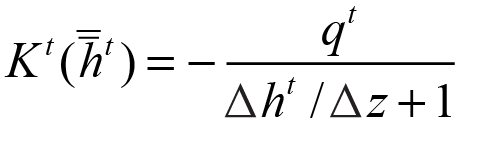

<p dir="rtl" style="text-align: right;">
כאשר:

<p dir="rtl" style="text-align: right;">
k - המוליכות ההידראולית של הקרקע [cm/sec]
<p dir="rtl" style="text-align: right;">
q - שטף המים בקרקע [cm/sec]
<p dir="rtl" style="text-align: right;">
Δh -  בין 2 נקודות המדידה הפרש פוטנציאל המטריצי של הקרקע [cm]
<p dir="rtl" style="text-align: right;">
Δz - הפרש הגובה בין 2 נקודות המדידה [cm]

## Results

### Soil Hydraulic conductivity 

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [33]:
#file_path = '/content/drive/MyDrive/gdrive_folder/Agrotech_project/final_data.xlsx' # enter your data file path here - this line can be deleted after Yehuda agrees
file_path = 'https://github.com/deedeeharris/agritech2021/blob/main/report/final_data.xlsx?raw=true' # enter your data file path here
df = pd.read_excel(file_path, names = ['Date', 'ID', 'Weight_(g)', 'Pressure_Bottom_(cmH20)', 'Pressure_Top_(cmH20)']) # reading the raw date (xlsx)
# make 'date' the dataframe index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')
#df  #uncomment to see the dataFrame

/usr/local/lib/python3.7/dist-packages/dateutil/parser/_parser.py:1218: UnknownTimezoneWarning: tzname IDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  category=UnknownTimezoneWarning)


**Plotting the raw results:**

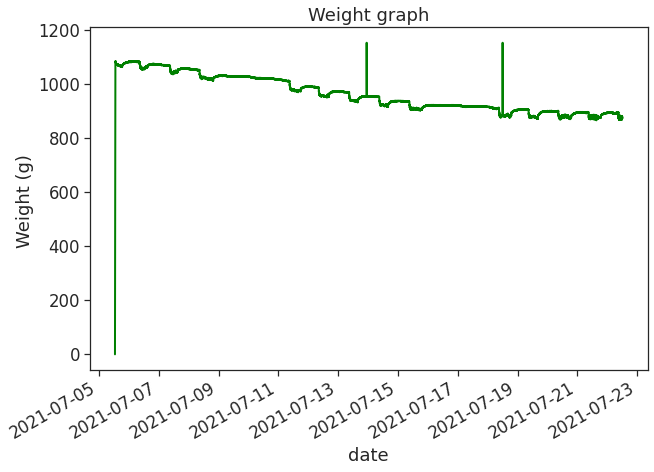

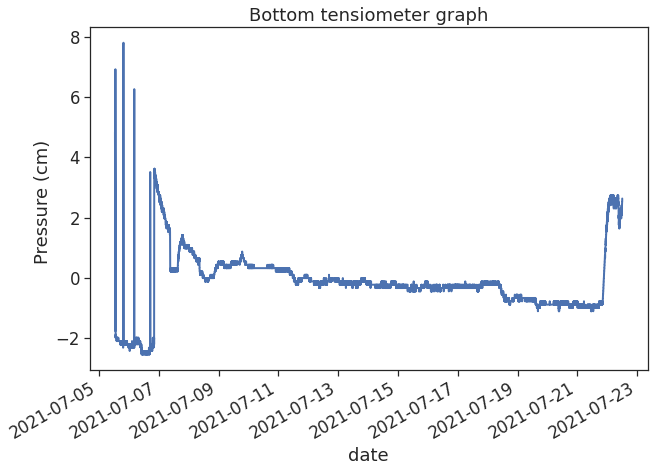

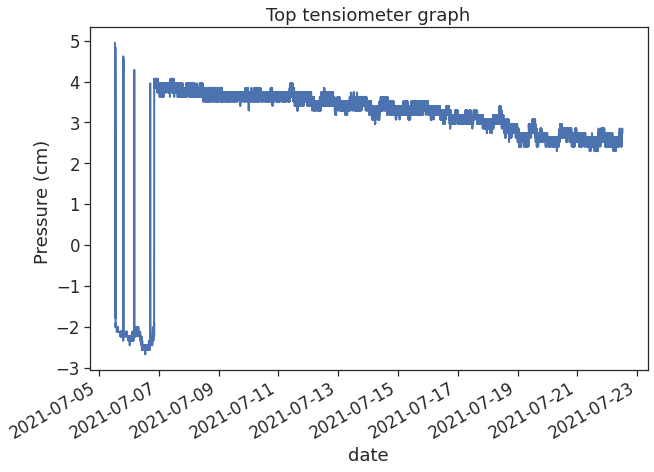

In [34]:
# weight graph
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Weight_(g)'],  linewidth=2, color = "green")
ax.set(xlabel="date",
       ylabel="Weight (g) ",
       title="Weight graph");
plt.gcf().autofmt_xdate()  # makes slated dates
# Bottom tensiometer
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Pressure_Bottom_(cmH20)'],  linewidth=2)
ax.set(xlabel="date",
       ylabel="Pressure (cm) ",
       title="Bottom tensiometer graph");
plt.gcf().autofmt_xdate()  
# Top tensiometer
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Pressure_Top_(cmH20)'],  linewidth=2)
ax.set(xlabel="date",
       ylabel="Pressure (cm) ",
       title="Top tensiometer graph");
plt.gcf().autofmt_xdate() 

<p dir="rtl" style="text-align: right;">
1.   כפי שניתן לראות בגרפים לא ניתן לתייחס לניסוי בכל טוווח הזמן בעקבות אי דיוקים בחלק הראשון והאחרון של הניסוי. לכן ניצור גרפים חדשים מהנתונים בטווח הזמן בו אפשר לקבל תוצאות יציבות. בנוסף, נמחוק את 2 הערכים הגבוהים שהתקבלו במשקל כתוצאה מסטייה על מנת שלא יפריעו לנתונים.

<p dir="rtl" style="text-align: right;">
2.  למעשה הניסוי מורכב מעשרות אלפי נקודות מדידה. על מנת "ליישר" את הגרף ולמנוע סטיות נשתמש בפונקציית resample לממוצע של 800 דקות כל פעם.


<p dir="rtl" style="text-align: right;">
3. הנתונים מהטנסיומטר העליון לא נראים אמינים (לאורך כל הניסוי נרשמה רק ירידה ביחידת לחץ של ס"מ). יכול להיות שמדובר בחיישן שהתקלקל או שסביב הטנסיומטר היה חלל עם אויר שלא נתן לא לחוש את לחץ המים. על מנת להתיייחס לנתונים נשתמש רק בטנסיומטר התחתון.

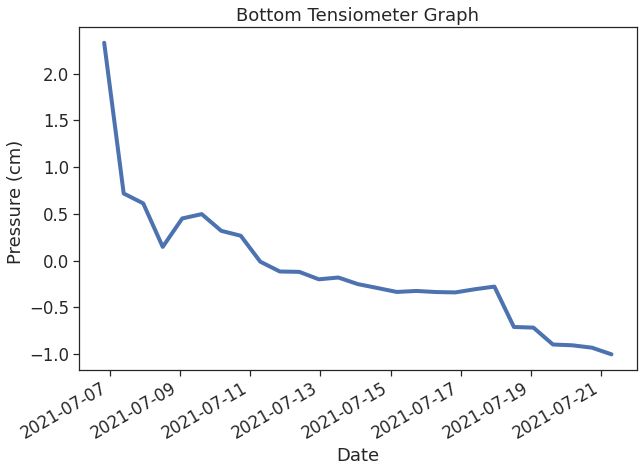

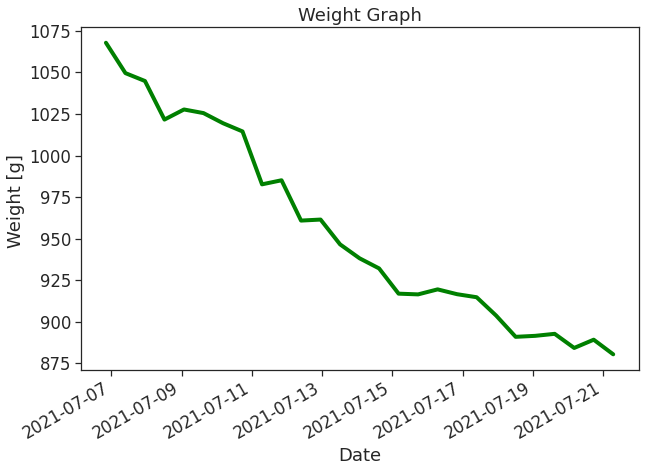

In [35]:
start_date = '2021-07-06 20:14:33' # since readings weren't accurate at the begining of the exp, we chose a later start_date for the plot
end_date = '2021-07-21 15:53:15' # # we chose an earlier end_date for the plot from the raw data, because we left the SHC Meter running for an extra few days
df_raw_backup = pd.DataFrame.copy(df) # backup for the raw data frame
df = df[df['Weight_(g)'] < 1100] # deleting the high values of weight in the middle of the measurment
df = df.loc[start_date:end_date]
df = (df.resample('800min', origin='start') # resample results, calc the mean every 800min
                        .mean()
             )
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Pressure_Bottom_(cmH20)'],  linewidth=4, )
ax.set(xlabel="Date",
       ylabel="Pressure (cm) ",
       title="Bottom Tensiometer Graph");
plt.gcf().autofmt_xdate()  
fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df['Weight_(g)'],color = "green",  linewidth=4)
ax.set(xlabel="Date",
       ylabel="Weight [g] ",
       title="Weight Graph");
plt.gcf().autofmt_xdate() 
# len(df) # uncomment to see the number of dots plotted after resampling 

In [36]:
# column of the difference between the pressures in the tensiometer:

# df['Delta P(cmH20)'] = df['Pressure_Top_(cmH20)'] - df['Pressure_Bottom_(cmH20)'] # Use this line instead of line 4 when both pressure sensors give 'good' date
df['Delta P(cmH20)'] = df['Pressure_Bottom_(cmH20)']
# column of Q
ring_weight = 125.9 # [g], the weight of the plastic ring with sensors (without soil)
start_weight = 1137.5  # the initial weight of the entire system (ring, soil, water). must weigh in the beginning.
df['Weight_(g)'] = df['Weight_(g)'] + 55.5 # calibration due to offset of our scale
df['delta_Mass_(g)'] = start_weight - df['Weight_(g)'] - ring_weight # calcs the change in weight influenced by water evaporation.
df['Q(cm^3/sec)'] = df['delta_Mass_(g)']/15 # convert from cm^3/15sec into cm^3/sec

# column of q based on the equation q = Q/A

diameter = 10.536 # this is the diameter of the ring [cm]  
Area = (diameter/2)**2 * np.pi   # [cm^2] , the area of the pipe
df['q(cm/sec)'] = df['Q(cm^3/sec)'] / Area

# column of K - soil hydraulic conductivity
delta_z = 2 # [cm]
df['k(cm/s)'] = -df['q(cm/sec)']/(1 + (df['Delta P(cmH20)']/delta_z))

# df  #uncomment to see the full DataFrame

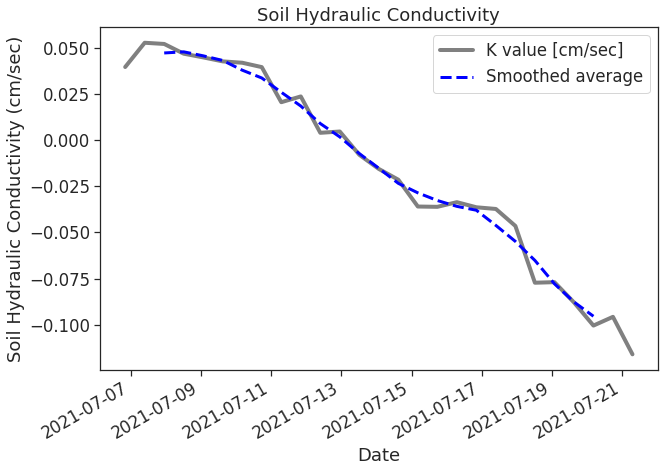

In [37]:
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# values for y axis:
ax.plot(df['k(cm/s)'],label='K value [cm/sec]', color="grey", linewidth=4 )
smooth = df['k(cm/s)'].rolling(5, center=True).mean() 
ax.plot(smooth, label='Smoothed average', color="blue", linestyle="--", linewidth=3)
# axes labels and figure title
ax.set_xlabel('Date')
ax.set_ylabel('Soil Hydraulic Conductivity (cm/sec)')
ax.set_title('Soil Hydraulic Conductivity')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates
ax.legend(loc = 'upper right')

### water retention curve


In [38]:
# Volumetric moisture content:
height = 6 #[cm]. enter the height of soil in ring
start_volume = Area * height                     # input the initial volume of the sample: soil + saturated water
soil_weight = 788.2                              # input the weight of soil whithout water (air dried)
Vw = df['Weight_(g)'] - soil_weight -ring_weight # volume of the water = weight of water = weight of sample - weight of soil
df['ϴ'] = Vw / start_volume
# df['averege_p(cm)'] = (df['Pressure_Bottom_(cmH20)']+df['Pressure_Top_(cmH20)'])/2 # calc the average between the two pressure sensors. needed for the retension curve. further details see under 'Links'   
df['averege_p(cm)'] = df['Pressure_Bottom_(cmH20)'] # using only readings from the bottom pessure sensor, because the the top sensor was faulty.

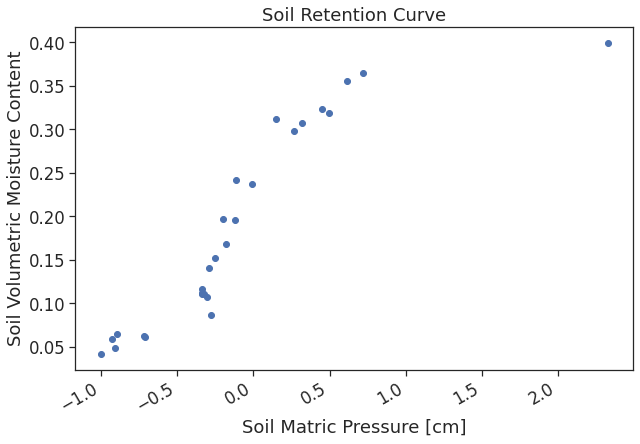

In [39]:
# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# values for y axis:
ax.plot(df['averege_p(cm)'],df['ϴ'],'o', linewidth=4 )
# axes labels and figure title
ax.set_ylabel('Soil Volumetric Moisture Content')
ax.set_xlabel('Soil Matric Pressure [cm]')
ax.set_title('Soil Retention Curve')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates

In [40]:
# Fitting the data:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)
ydata = df['ϴ']
xdata = df['averege_p(cm)']
# min(ydata) = df['ϴ'].min()
p0 = [max(ydata), np.median(xdata),1,min(ydata)] # this is an mandatory initial guess

popt, pcov = curve_fit(sigmoid, xdata, ydata,p0, method='dogbox')
x = df['averege_p(cm)']
y = sigmoid(x, *popt)

# creates figure (the canvas) and the axis (rectangle where the plot sits)
fig, ax = plt.subplots(1, figsize=(10,7))
# values for y axis:
ax.plot(x,y,'--',color='red', linewidth=3 , label = "Fit")
ax.plot(df['averege_p(cm)'],df['ϴ'],'o', linewidth=4, label = "data" )
# axes labels and figure title
ax.set_ylabel('soil Volumetric moisture content')
ax.set_xlabel('soil matric Pressure (cm)')
ax.set_title('Soil retention curve')
# some ticks adjustments
plt.gcf().autofmt_xdate()  # makes slated dates
plt.legend(loc='best')

NameError: ignored

## Discussion

<p dir="rtl" style="text-align: right;">
1. באופן כללי ניתן להתרשם בצורה חיובית מן התוצאות של הניסוי. גם עקום התאחיזה וגם גרף המוליכות ההידראולית מראים את המגמה המופיעה בספרות.

<p dir="rtl" style="text-align: right;">
המוליכות ההידראולית מושפעת באופן ישיר מתכולת הרטיבות של הקרקע. לכן, ככל שהניסוי התקדם, יותר מים התאדו מהמערכת ולכן גם המוליכות ההידראולית ירדה. בתחילת הניסוי תכולת הרטיבות יחסית קבועה מכיוון שעד ערך פריצת האויר הקרקע רוויה והמוליכות ההידראולית שווה למוליכות ההידראולית ברוויה. 

<p dir="rtl" style="text-align: right;">
גם המגמה הנראית בעקום התאחיזה הגיונית - ככל שתכולת הרטיבות גבוהה יותר כך העומד המטריצי גבוה יותר וכאשר הלחץ גבוה מערך פריצת האויר לא נצפה לעלייה בתכולת הרטיבות מכיוון שהקרקע רוויה והגרף מגיע לפלטו. חשוב לשים לב לכך שישנם ערכים של עומד מטריצי בהם יש כפילות בתכולת הרטיבות ולכן הגרף לא "חלק" (ככה"נ כתוצאה מקפיצות חריגות במדידות הלחץ וחזרה למדידות תקינות).

<p dir="rtl" style="text-align: right;">
2. חשוב לציין שלערכים עצמם של העומד המטריצי אין אפשרות להתייחס כאמינים. מכיוון שלא היתה לנו דרך לבצע עקום כיול על חיישני הלחץ הערכים שהתקבלו צריכים להיות מוכפלים בפקטור שייקבע על ידי עקום הכיול. בנוסף, חיישני הלחץ היו מותאמים ללחץ אויר ולא ללחץ מים. בפעמים הבאות מומלץ להשתמש בחיישני לחץ מים על מנת לדייק את המדידה (חשוב לשים לב שיש רצף של מים על מנת שהמתח לא יישבר). מכיוון שכך לא ניתן לקבוע עבור הקרקע הנוכחית את הערכים של המוליכות ההידראולית, ערך פריצת האויר והתלות המדויקת בין תכולת הרטיבות לעומד מטריצי (לכל הנ"ל צריך לדעת את העומד המטריצי בצורה נכונה).

<p dir="rtl" style="text-align: right;">
3. במהלך הניסוי השתמשנו במשקל המותאם למדידה של עד 20 ק"ג. משקל זה איננו מתאים למערכת שבדקנו מכיוון שאנחנו מדדנו שינוי בטווח ערכים של גרמים. עם זאת, חשוב לציין כי המשקל הסופי שנמדד בסוף הניסוי תאם למשקל המערכת ללא מים שבוצע בעזרת משקל אנליטי במעבדה. בכל זאת מומלץ להשתמש במשקל המתאים לערכי  המדידה.



## Links and sources

1. For more details about the Hyprop Meter click [here](https://www.metergroup.com/environment/articles/how-to-measure-soil-hydraulic-conductivity-which-method-is-right-for-you/) 
2. For the official manual of the Hyprop: [here](http://library.metergroup.com/Manuals/18263_HYPROP_Manual_Web.pdf)
3. For detailed instructions visit our instructable: [here](https://www.instructables.com/Measuring-Hydraulic-Properties-of-Soil-With-ESP32/)